# Gene Expression Analysis
The purpose of this notebook is to analyze a gene expression dataset using python. We will be answering questions such as:
* Can gene expression data help us group patients or indiviauls for disease diagnosis?
* Can such data help identify relationships between patients? (differences and similarities genome wide).

### 1. Dataset Description

The dataset for this analysis is obtained from OmicsLogic Bioinformatics course and can be downloaded [here](https://raw.githubusercontent.com/pine-bio-support/DataScience/main/Final_cell_lines_RNA-expression_FPKM_values_1000genes_with_NA.txt). The data is in tabular format and contains 1000 entries of gene expression data for 11 samples. We assume that each sample corresponds to a unique individual's data.

### 2. Exploratory Data Analysis

#### 2.1 Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

#### 2.2 Helper Functions

In [2]:
def outlier_remover(data_df):
    """
    This function can remove outliers from a pandas dataframe of numerical values for all columns
    data_df: pandas.dataframe
    output: clean dataframe
    """
    template_df = data_df.copy()
    columns = template_df.columns
    
    for column in columns:
        
        # compute the first and third quartile
        thirth_quartile, first_quartile = np.percentile(template_df.loc[:,column],[75,25])
        interquatile_range = thirth_quartile - first_quartile

        max = thirth_quartile+(1.5*interquatile_range)
        min = first_quartile-(1.5*interquatile_range)

        template_df.loc[template_df[column] < min,column] = np.nan
        template_df.loc[template_df[column] > max,column] = np.nan
        
    template_df.dropna(inplace = True)
    try:
        n = int(template_df.index[0])
        template_df.reset_index(inplace = True, drop = True)
    except:
        pass
    return template_df


def df_normalize(data_df, option = "columns"):
    """
    This function helps to normalize a dataframe that contains only numerical value.
    data_df: pandas.dataframe
    option: can be 'columns' or 'rows' to determine if normalizationj should be done across rows or columns
    
    output: normalized dataframe
    """
    
    norm_df = data_df.copy()
    
    if option == "rows":
        norm_df = norm_df.transpose()
        norm_df = (norm_df - norm_df.mean())/(norm_df.std())
        norm_df = norm_df.transpose()
        return norm_df
    
    norm_df = (norm_df - norm_df.mean())/(norm_df.std())
    return norm_df

#### 2.3 Load Dataset

In [3]:
data = pd.read_table("datasets/gene_expression analysis.txt")

Let’s look at the data and see what variables it contains. 

In [4]:
data.head(10)

,id,Non-malignant,Non-malignant.1,Non-malignant.2,Non-malignant.3,Non-malignant.4,Claudin-low,Claudin-low.1,Claudin-low.2,Claudin-low.3,Claudin-low.4,Claudin-low.5
0,ENSG00000131746.11,373.26,333.98,474.49,303.75,465.48,0.10,0.10,0.23,0.09,0.05,0.92
1,ENSG00000065618.15,351.31,545.60,207.94,219.26,332.95,0.05,0.37,0.00,1.72,0.12,1.88
2,ENSG00000128422.14,1927.78,5882.94,3161.55,1722.58,6828.70,1.20,0.43,0.00,2.71,1.71,0.45
3,ENSG00000111319.11,385.27,247.23,148.99,123.84,139.87,0.09,2.25,0.23,1.82,1.03,2.63
4,ENSG00000189334.7,693.32,950.08,565.24,292.25,985.39,0.00,1.07,0.52,0.56,0.12,0.00
5,ENSG00000076826.8,9.26,11.65,6.87,6.91,10.06,0.24,0.44,0.12,0.89,0.93,0.05
6,ENSG00000137699.15,258.79,620.89,286.77,186.01,234.96,0.50,0.22,0.28,1.45,0.57,0.15
7,ENSG00000053747.14,132.11,76.79,180.46,317.22,169.81,3.24,1.86,1.10,0.04,1.26,0.13
8,ENSG00000205420.9,2097.25,4090.68,1239.68,3333.76,6226.36,0.60,14.23,0.10,0.19,0.33,0.14
9,ENSG00000132470.12,892.46,541.32,708.80,235.69,895.60,0.32,2.27,3.26,0.79,0.62,9.85


In [5]:
#Remove ID column to kep only numeric data
data.index = data.id
data=data.drop(['id'], axis = 1) 
data.head(10)

,Non-malignant,Non-malignant.1,Non-malignant.2,Non-malignant.3,Non-malignant.4,Claudin-low,Claudin-low.1,Claudin-low.2,Claudin-low.3,Claudin-low.4,Claudin-low.5
id,,,,,,,,,,,
ENSG00000131746.11,373.26,333.98,474.49,303.75,465.48,0.10,0.10,0.23,0.09,0.05,0.92
ENSG00000065618.15,351.31,545.60,207.94,219.26,332.95,0.05,0.37,0.00,1.72,0.12,1.88
ENSG00000128422.14,1927.78,5882.94,3161.55,1722.58,6828.70,1.20,0.43,0.00,2.71,1.71,0.45
ENSG00000111319.11,385.27,247.23,148.99,123.84,139.87,0.09,2.25,0.23,1.82,1.03,2.63
ENSG00000189334.7,693.32,950.08,565.24,292.25,985.39,0.00,1.07,0.52,0.56,0.12,0.00
ENSG00000076826.8,9.26,11.65,6.87,6.91,10.06,0.24,0.44,0.12,0.89,0.93,0.05
ENSG00000137699.15,258.79,620.89,286.77,186.01,234.96,0.50,0.22,0.28,1.45,0.57,0.15
ENSG00000053747.14,132.11,76.79,180.46,317.22,169.81,3.24,1.86,1.10,0.04,1.26,0.13
ENSG00000205420.9,2097.25,4090.68,1239.68,3333.76,6226.36,0.60,14.23,0.10,0.19,0.33,0.14


In this embedded table you will see the gene expression dataset, where rows are gene Ensembl ids and columns are sample IDs. Expression values are in the form of FPKM (Fragments Per Kilobase of transcript per Million mapped reads) values, which the relative expression of a transcript (proportional to the number of cDNA fragments that originate from it). 

By looking at the gene expression table, it is difficult to derive any conclusion about the data. Thus, visualization plots help us to understand the differences and derive conclusion about the data. Before, performing data visualization, it is important to process this data. Since, this type of gene expression data contains a lot of noise that we first need to address. For this task, we will clean the data by filtering (for example if you have missing data) and by transforming it’s scale into logarithm for a more “normal” distribution.

View data and transform for visualization: This type of gene expression data contains a lot of noise that we first need to address. For this task, we will clean the data by filtering (for example if you have missing data) and by transforming it’s scale into logarithm for a more “normal” distribution.

In [6]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, ENSG00000131746.11 to ENSG00000186832.7
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Non-malignant    1000 non-null   float64
 1   Non-malignant.1  1000 non-null   float64
 2   Non-malignant.2  999 non-null    float64
 3   Non-malignant.3  1000 non-null   float64
 4   Non-malignant.4  1000 non-null   float64
 5   Claudin-low      994 non-null    float64
 6   Claudin-low.1    998 non-null    float64
 7   Claudin-low.2    996 non-null    float64
 8   Claudin-low.3    997 non-null    float64
 9   Claudin-low.4    997 non-null    float64
 10  Claudin-low.5    1000 non-null   float64
dtypes: float64(11)
memory usage: 93.8+ KB


###### Observation
As you can see the dataset contains 1000 entries. However, some features (columns) have a non-null count less than 1000 indicating that the dataset includes entries with missing values. These entries are removed in the next cell.

In [7]:
# removing entries with missing values
before_n = len(data)
data.dropna(inplace = True)
print(f"{before_n - len(data)} entries with missing values have been remove. There are now {len(data)} entries")

8 entries with missing values have been remove. There are now 992 entries


In [8]:
data.head(10)

,Non-malignant,Non-malignant.1,Non-malignant.2,Non-malignant.3,Non-malignant.4,Claudin-low,Claudin-low.1,Claudin-low.2,Claudin-low.3,Claudin-low.4,Claudin-low.5
id,,,,,,,,,,,
ENSG00000131746.11,373.26,333.98,474.49,303.75,465.48,0.10,0.10,0.23,0.09,0.05,0.92
ENSG00000065618.15,351.31,545.60,207.94,219.26,332.95,0.05,0.37,0.00,1.72,0.12,1.88
ENSG00000128422.14,1927.78,5882.94,3161.55,1722.58,6828.70,1.20,0.43,0.00,2.71,1.71,0.45
ENSG00000111319.11,385.27,247.23,148.99,123.84,139.87,0.09,2.25,0.23,1.82,1.03,2.63
ENSG00000189334.7,693.32,950.08,565.24,292.25,985.39,0.00,1.07,0.52,0.56,0.12,0.00
ENSG00000076826.8,9.26,11.65,6.87,6.91,10.06,0.24,0.44,0.12,0.89,0.93,0.05
ENSG00000137699.15,258.79,620.89,286.77,186.01,234.96,0.50,0.22,0.28,1.45,0.57,0.15
ENSG00000053747.14,132.11,76.79,180.46,317.22,169.81,3.24,1.86,1.10,0.04,1.26,0.13
ENSG00000205420.9,2097.25,4090.68,1239.68,3333.76,6226.36,0.60,14.23,0.10,0.19,0.33,0.14


In [9]:
# Information
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 992 entries, ENSG00000131746.11 to ENSG00000186832.7
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Non-malignant    992 non-null    float64
 1   Non-malignant.1  992 non-null    float64
 2   Non-malignant.2  992 non-null    float64
 3   Non-malignant.3  992 non-null    float64
 4   Non-malignant.4  992 non-null    float64
 5   Claudin-low      992 non-null    float64
 6   Claudin-low.1    992 non-null    float64
 7   Claudin-low.2    992 non-null    float64
 8   Claudin-low.3    992 non-null    float64
 9   Claudin-low.4    992 non-null    float64
 10  Claudin-low.5    992 non-null    float64
dtypes: float64(11)
memory usage: 93.0+ KB


In [10]:
#Convert integers to floats 
datafinal = data.astype(float) 
#Perform log transformation using numpy package and show data description
log = np.log(datafinal+1) 
log.describe() 

,Non-malignant,Non-malignant.1,Non-malignant.2,Non-malignant.3,Non-malignant.4,Claudin-low,Claudin-low.1,Claudin-low.2,Claudin-low.3,Claudin-low.4,Claudin-low.5
count,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000,992.000000
mean,2.628754,2.658477,2.528570,2.582641,2.562826,1.803960,1.922570,1.942349,1.852786,1.936306,1.980725
std,1.746368,1.859622,1.730852,1.751103,1.832985,1.612195,1.555188,1.540971,1.603401,1.629480,1.588135
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.279541,1.180189,1.222301,1.234014,1.162368,0.343590,0.570980,0.667829,0.474677,0.500775,0.681831
50%,2.540023,2.529720,2.373509,2.398800,2.380004,1.545412,1.687321,1.698364,1.573806,1.622350,1.723659
75%,3.685436,3.855558,3.604478,3.666570,3.650918,2.852005,2.933591,2.945092,2.871868,3.009752,2.973997
max,8.845625,8.905592,8.829200,8.292478,8.933049,7.873826,8.265887,7.811771,7.938567,7.751794,8.082776


In [11]:
log.head(10)

,Non-malignant,Non-malignant.1,Non-malignant.2,Non-malignant.3,Non-malignant.4,Claudin-low,Claudin-low.1,Claudin-low.2,Claudin-low.3,Claudin-low.4,Claudin-low.5
id,,,,,,,,,,,
ENSG00000131746.11,5.924951,5.814071,6.164346,5.719492,6.145215,0.095310,0.095310,0.207014,0.086178,0.048790,0.652325
ENSG00000065618.15,5.864511,6.303717,5.342047,5.394809,5.810991,0.048790,0.314811,0.000000,1.000632,0.113329,1.057790
ENSG00000128422.14,7.564643,8.679982,8.059134,7.452159,8.829036,0.788457,0.357674,0.000000,1.311032,0.996949,0.371564
ENSG00000111319.11,5.956537,5.514356,5.010569,4.827033,4.947837,0.086178,1.178655,0.207014,1.036737,0.708036,1.289233
ENSG00000189334.7,6.542933,6.857598,6.339018,5.681025,6.894052,0.000000,0.727549,0.418710,0.444686,0.113329,0.000000
ENSG00000076826.8,2.328253,2.537657,2.063058,2.068128,2.403335,0.215111,0.364643,0.113329,0.636577,0.657520,0.048790
ENSG00000137699.15,5.559874,6.432763,5.662162,5.231162,5.463662,0.405465,0.198851,0.246860,0.896088,0.451076,0.139762
ENSG00000053747.14,4.891176,4.354013,5.201035,5.762743,5.140552,1.444563,1.050822,0.741937,0.039221,0.815365,0.122218
ENSG00000205420.9,7.648859,8.316711,7.123415,8.112156,8.736708,0.470004,2.723267,0.095310,0.173953,0.285179,0.131028


#### 2.4 Create the boxplot

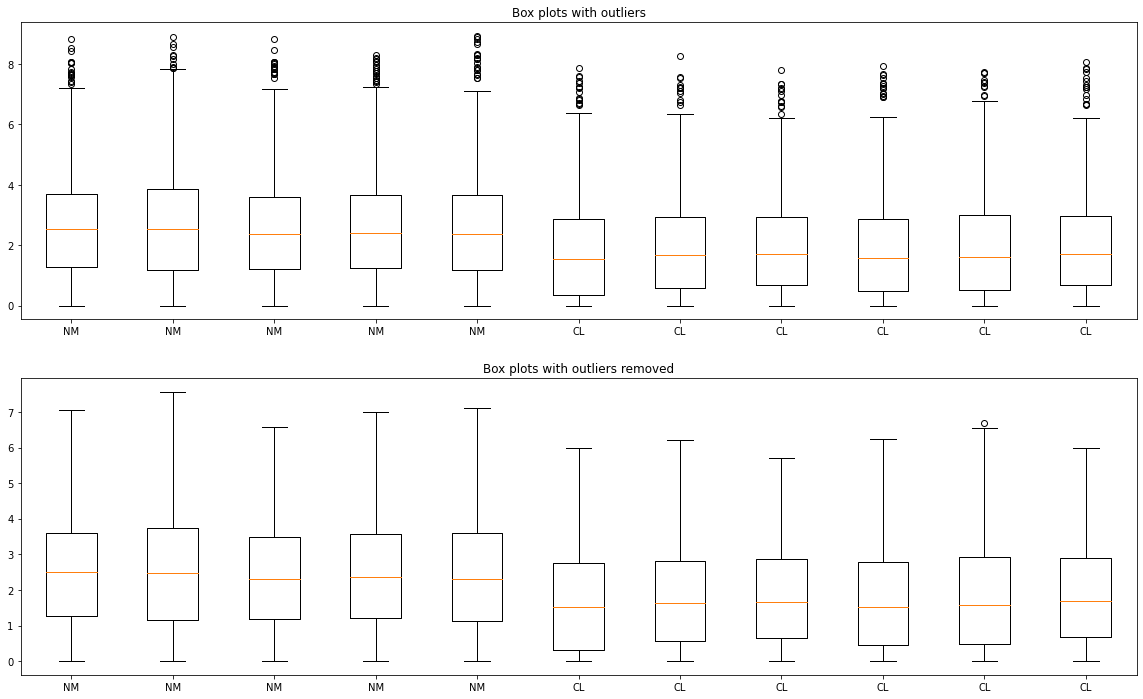

In [12]:
x_labels = [x.split("-")[0][0].upper() + x.split("-")[1][0].upper() for x in log.columns]
no_outlierlog = outlier_remover(log)
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,12));
ax1.set_title("Box plots with outliers")
ax2.set_title("Box plots with outliers removed")
ax1.boxplot(log, labels = x_labels);
ax2.boxplot(no_outlierlog, labels = x_labels);

###### Observation
* It can be clearly seen that the average gene expression values for non-malignant samples is similar amongst all non-malignant samples and different from other samples.
* The same can be said of Claudin-low samples. They all have similar gene expression mean values. 
* The difference in gene expression profile amongst similar samples is not very noticeable with box plots. However, it can be observed that the removal of outliers has helped to remove unnecessary variations in the dataset.


#### 2.5 Create histogram

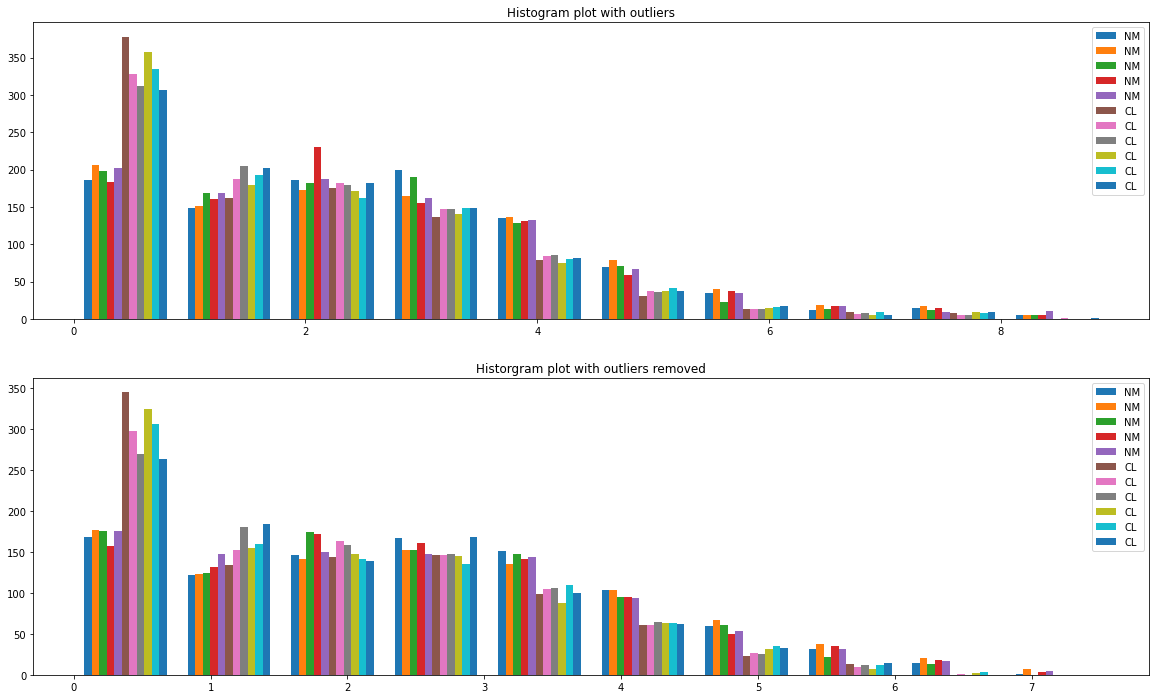

In [13]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(20,12));
ax1.set_title("Histogram plot with outliers")
ax2.set_title("Historgram plot with outliers removed")
ax1.hist(log, label = x_labels);
ax1.legend();
ax2.hist(no_outlierlog, label = x_labels);
ax2.legend();

###### Observation
* The histograms above show the number of genes with different gene expression values across samples. On the x axis is the gene expression value scaled to between 0 and 8.
* You can see that very few genes have a very high expression profile across all samples. 
* Fewer genes have a high expression level across all samples.
* Not much can be concluded from this histogram.

#### 2.6 Create a Clustermap

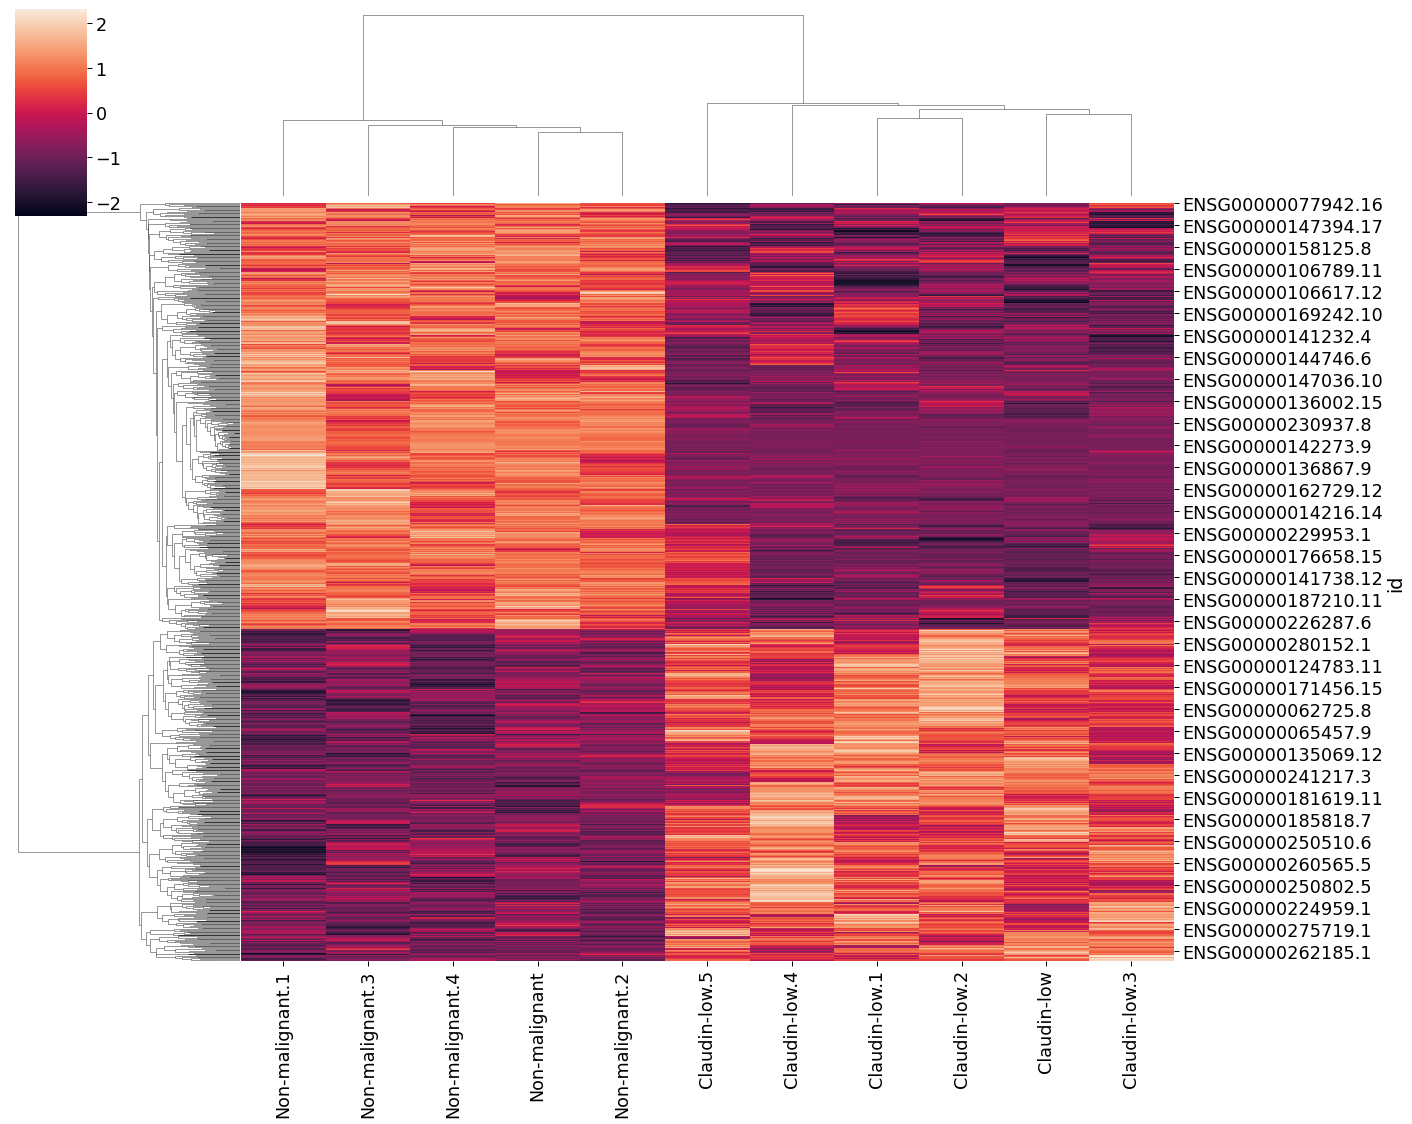

In [14]:
gene_norm_df = df_normalize(no_outlierlog, option = "rows");
sns.set_context("paper", font_scale = 2);
sns.clustermap(gene_norm_df, xticklabels = gene_norm_df.columns,
               figsize = (20,16)
              );

###### Observation
* The gene expression values for each gene are first standardized across samples
* This map can be used to compare samples
* As can see, the gene expression profile for each disease group is clearly different. For example, genes that are highly expressed in non-malignant samples are lowly expressed in Claudin-low samples. Also, there are more highly expressed genes in non-malignat samples than in Claudin-low samples. 
* Also, similar diseases are clustered together.

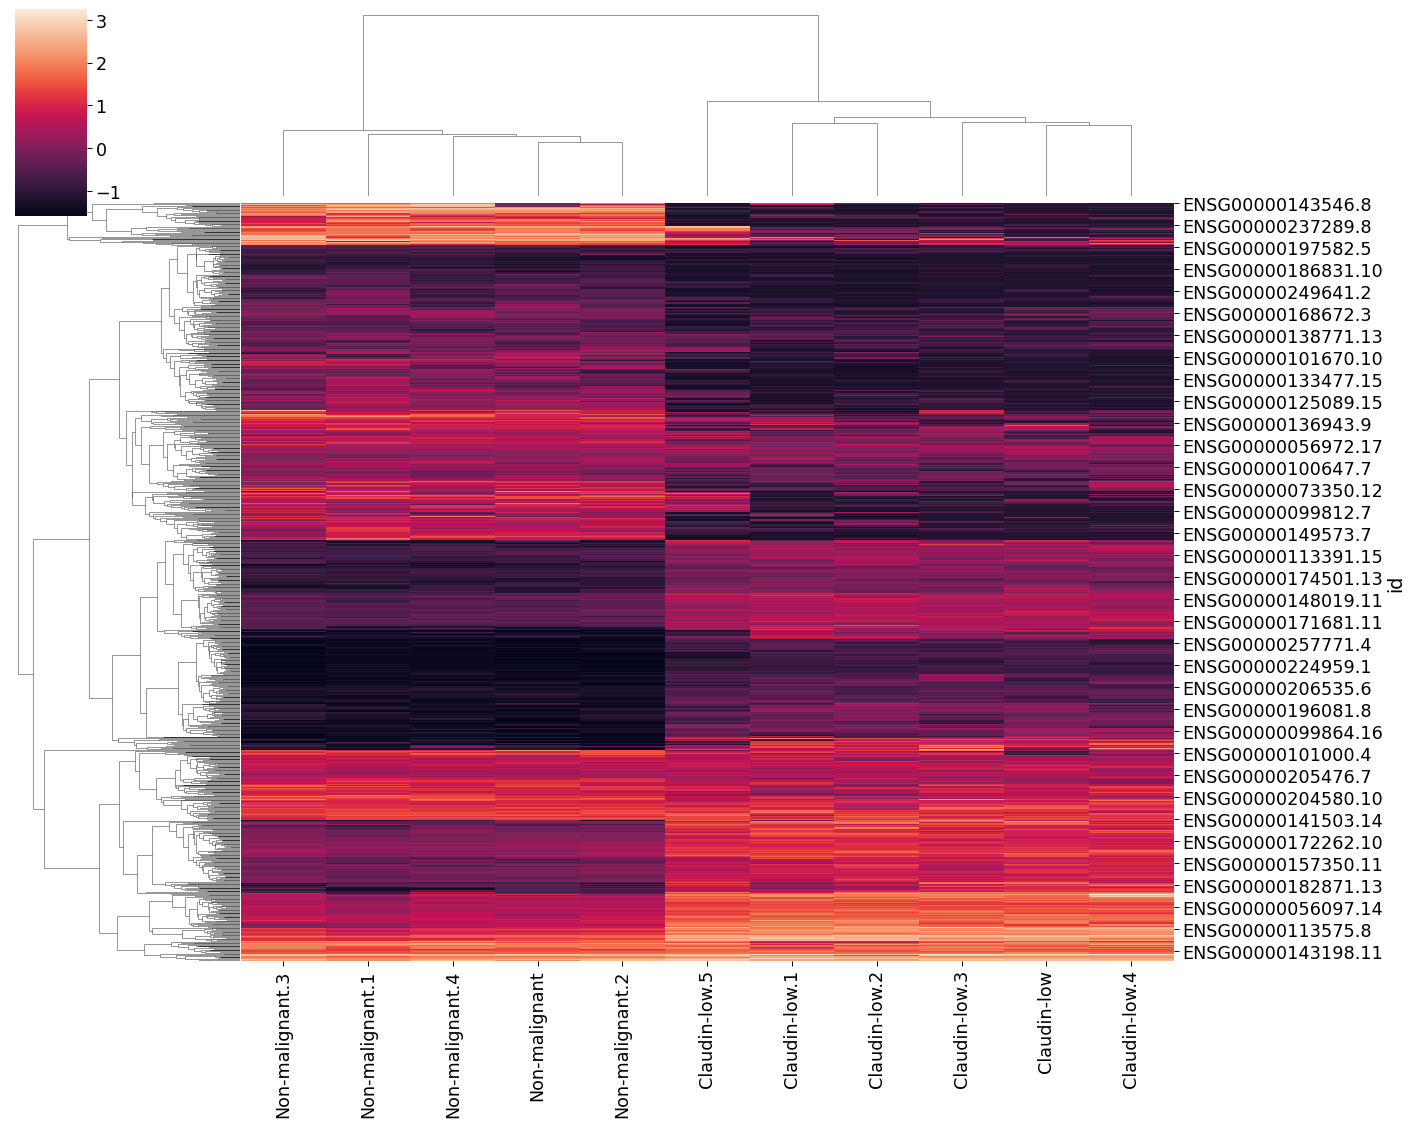

In [16]:
sample_norm_df = df_normalize(no_outlierlog, option = "columns");
sns.set_context("paper", font_scale = 2);
sns.clustermap(sample_norm_df, xticklabels = sample_norm_df.columns,
               figsize = (20,16), 
               );

#### Observation
* The gene expression values for each sample are first standardized across genes
* This map can be used to compare the expression of genes across samples
* Again, the difference between smaples is easily seen but the difference between genes is not very apparantly as there are many genes with a similar profile.

### 3. Conclusion
From the first map, it can be seen that clustering algorithm accurately clusters samples with a similar gene expression profile. This is very important for molecular diagnostics recomendations different patients with different genomic profile respond differently to diseases. Therefore, a person can be recommended a treatment that was successful on patients who had a similar gene expression profile. 

Also, for patients or individuals who have identical gene expression profiles, information from one such patient may be helpful in making prognostic decisions for another such patient.